# CSC3831 - Practical I
Hello Class, welcome to the first practical session, By this point you should have found the github for Part I. For this practical please read the information in the text blocks, and run the code blocks in sequence.

In this part of the course we will use a few Python packages. The packages used are as follows:
- [Pandas](https://pandas.pydata.org/): Data manipulation and analysis tool
- [Matplotlib](https://matplotlib.org/): Data visualisation tool
- [Seaborn](https://seaborn.pydata.org/index.html): Data visualisation tool

**Pandas** is one of the most popular data manpiulation libraries that researchers and practitioners use. Due to its popularity, Pandas `DataFrame` works as an input to most other analysis and graphics tools.

**Matplotlib** is an extremely popular plotting tool with axis, scaling, subplots, and positioning built in. Matplotlib gives you almost complete control over how you want to graph things, but can be a little complicated to get nice looking graphics.

**Seaborn** is an extremely popular graphing tool which provides nice looking graphics without much difficulty.

As stated in Lecture I, we will be using the [Iris Flower dataset](https://gist.github.com/curran/a08a1080b88344b0c8a7) to walk you through some basic analysis in Python, with the end of today's practical giving you the freedom to perform the same on a Titanic dataset.


### Loading packages and data
Let us start with loading our packages as well as the Iris dataset.

In [ ]:
# Loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Commonly in online tutorials as well as tutorials of the relevant packages, Pandas is shorthanded as "pd", Matplotlib shorthanded as "plt", and Seaborn is shorthanded as "sns", following this convention we will do the same in the tutorial. It is not necessary to do so, but following convention makes the interpretability of your code by others much simpler.  

The version of the Iris dataset we are using is being hosted on the University of California Irvine (UCI) School of Informatics & Computer Science website.
Looking at the [data](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) itself, we can see the data\set is represented with **C**omma **S**eperated **V**alues or csv. While the file extension (what comes after the last period in a file name) is not csv but instead .data, the data itself is stored in csv format and can be parsed using a csv parser.

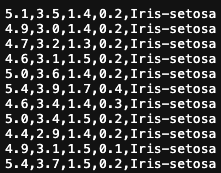

The Pandas library contains a csv parser called `read.csv`. For this practical we can understand it to, by default, turn a csv document into a Pandas dataframe with the first line of the data taken to represent the **attribute names**.

Looking at the raw data, the attribute names are not present so we must add them in manually using the `names` field.

C:\Users\Oscar\AppData\Local\Temp\ipykernel_47944\427490056.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


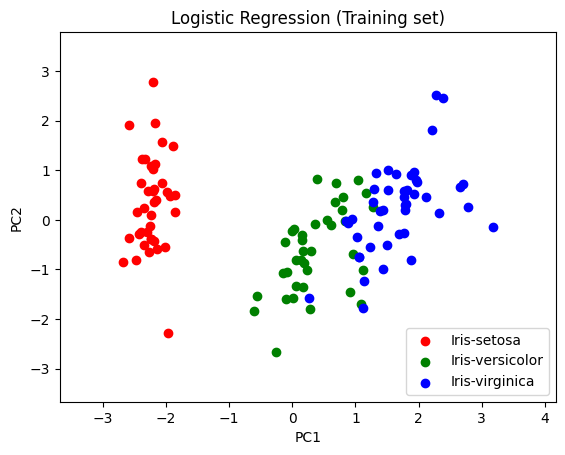

In [7]:
# Loading Iris Dataset
iris_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris = pd.read_csv(iris_url, names = col_names)
iris


x = iris.drop('Class', axis=1)
y = iris['Class']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

# Ensure the data is of type float
x1, x2 = x1.astype(float), x2.astype(float)


plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


#


So now we have turned our raw data into a DataFrame object with the appropriate attribute names. But what are Pandas DataFrames? In your previous computing courses, you should have learned about one-dimensional data structures like lists (e.g. arrays, linked-lists) and and two-dimensional structures like matrices (e.g. nested arrays).

Pandas provides one and two dimensional data structures via [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) and [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). The advantage of using Pandas data structures over the default Python is the ease of attribute and entity selection, as well as the basic statistics built into these data structures.

### Let's Take a Peek
Moving into some basic analysis, the first thing you should do when given a new set of data is take a peak at the data itself. After loading the data into Pandas, we can look at the top 10 rows by using the `.head(10)` method.

Loading MNIST dataset...


C:\Users\Oscar\AppData\Roaming\Python\Python312\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


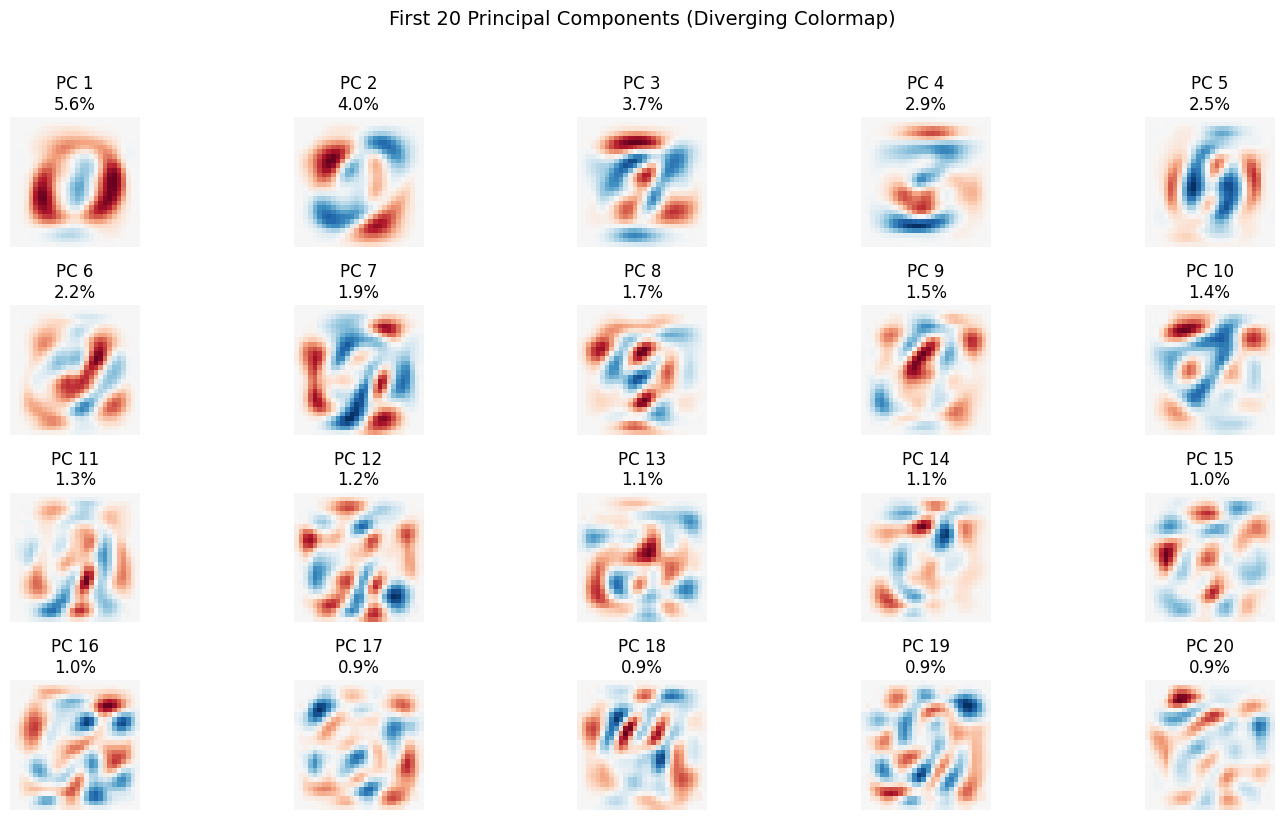

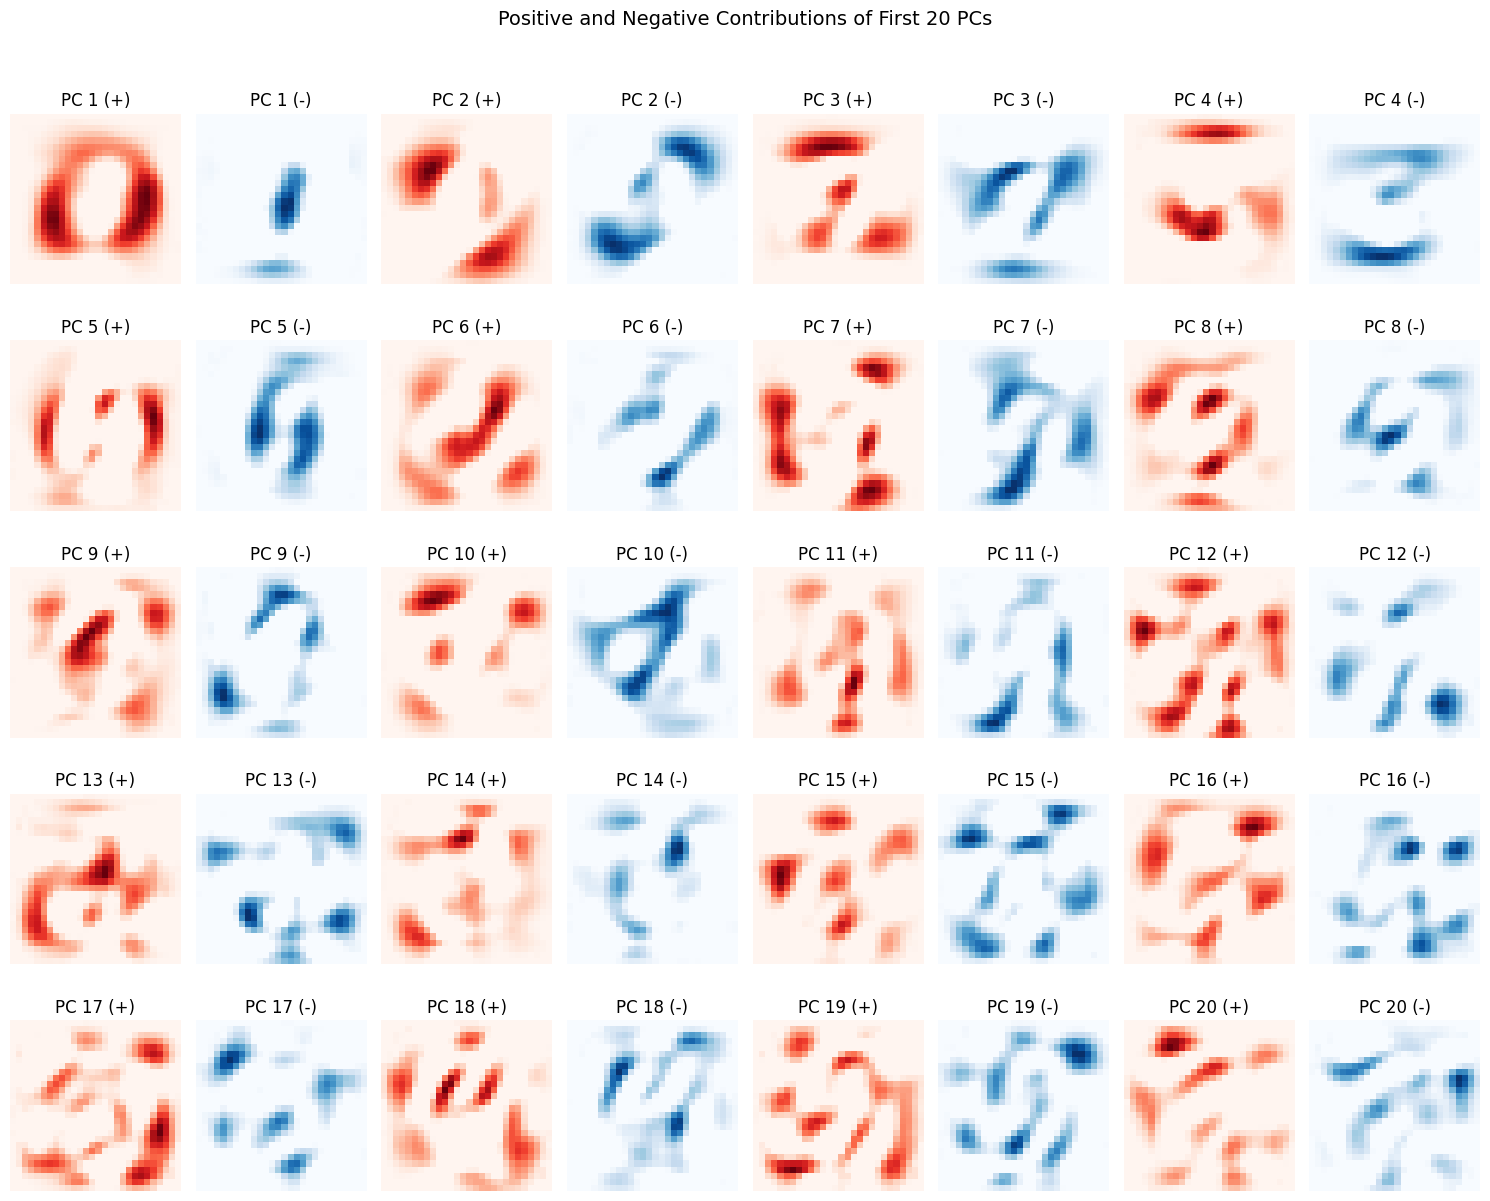

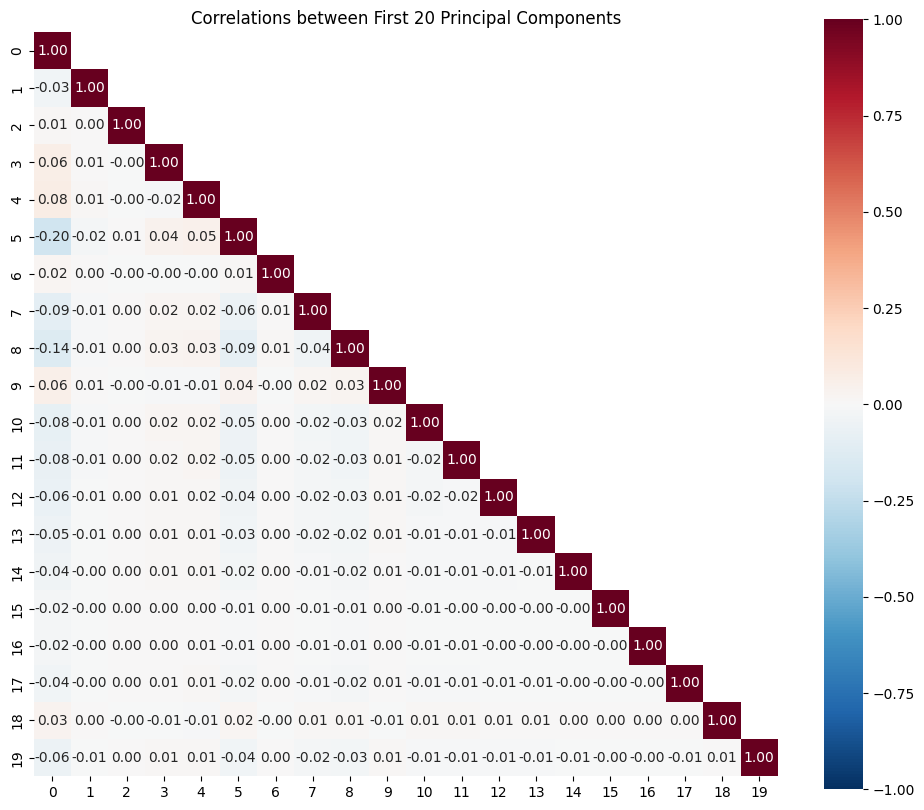

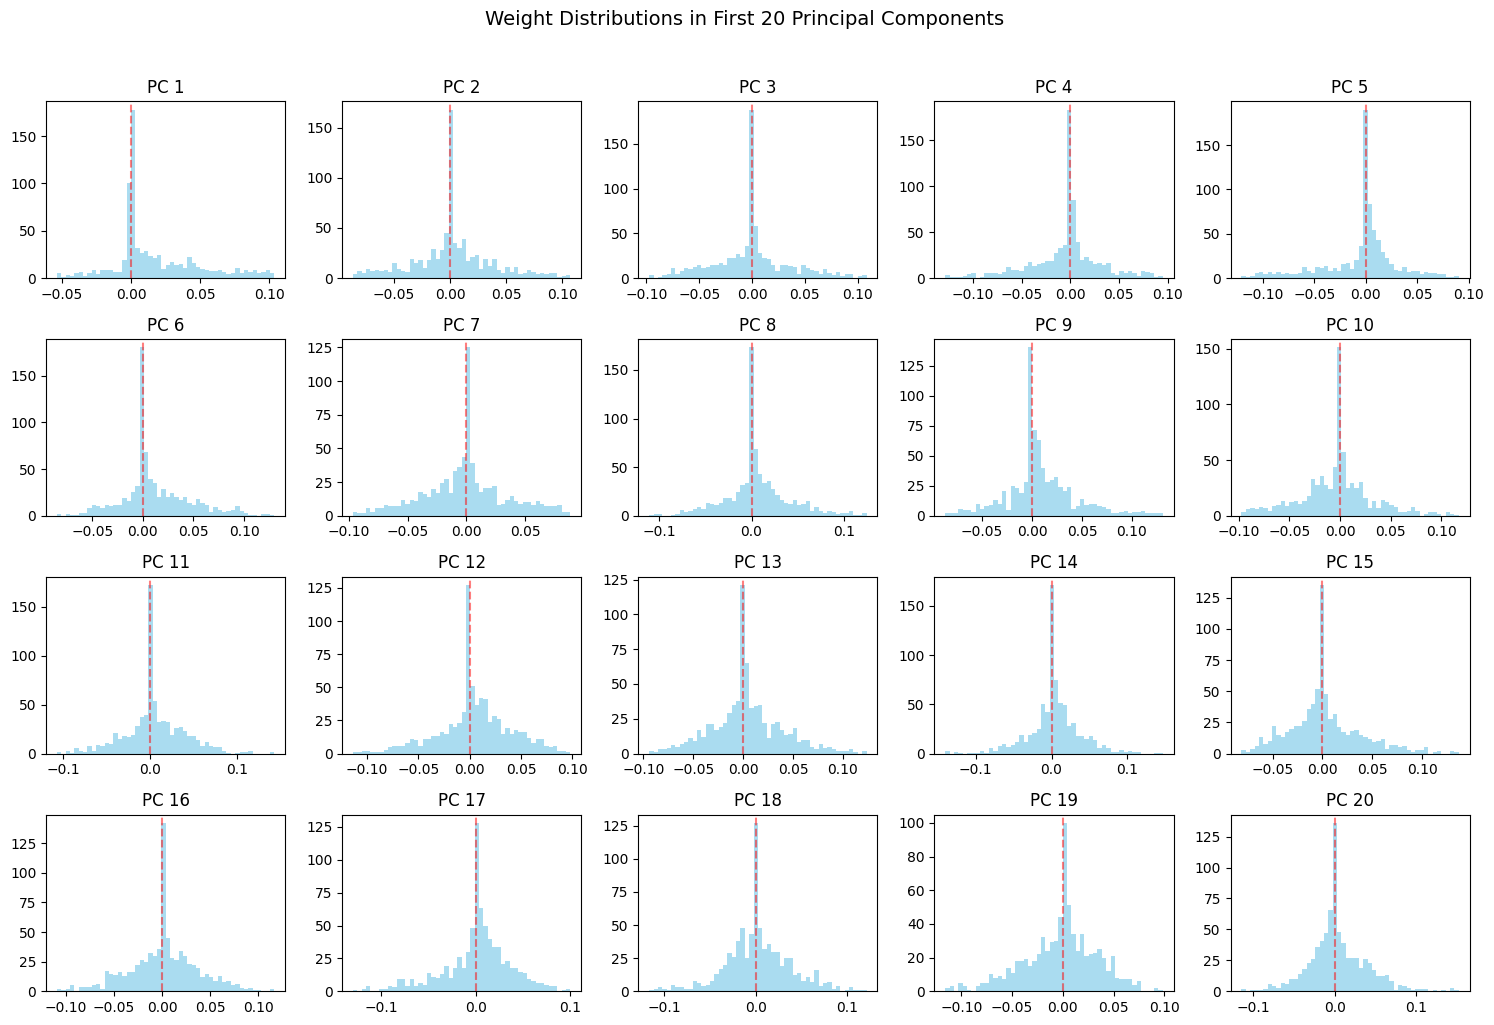

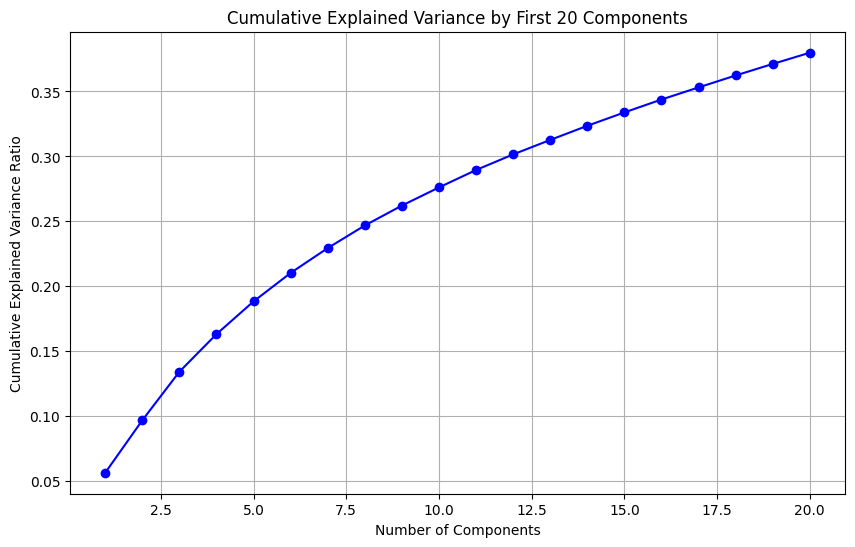


PCA Components Summary:

PC 1:
Explained variance ratio: 0.0564
Max absolute weight: 0.1036
Mean weight: 0.0175
Std of weights: 0.0311

PC 2:
Explained variance ratio: 0.0404
Max absolute weight: 0.1072
Mean weight: 0.0021
Std of weights: 0.0357

PC 3:
Explained variance ratio: 0.0374
Max absolute weight: 0.1085
Mean weight: -0.0005
Std of weights: 0.0357

PC 4:
Explained variance ratio: 0.0289
Max absolute weight: 0.1284
Mean weight: -0.0040
Std of weights: 0.0355

PC 5:
Explained variance ratio: 0.0252
Max absolute weight: 0.1207
Mean weight: -0.0047
Std of weights: 0.0354

PC 6:
Explained variance ratio: 0.0219
Max absolute weight: 0.1298
Mean weight: 0.0118
Std of weights: 0.0337

PC 7:
Explained variance ratio: 0.0191
Max absolute weight: 0.0962
Mean weight: -0.0012
Std of weights: 0.0357

PC 8:
Explained variance ratio: 0.0174
Max absolute weight: 0.1243
Mean weight: 0.0059
Std of weights: 0.0352

PC 9:
Explained variance ratio: 0.0153
Max absolute weight: 0.1307
Mean weight: 0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Load and preprocess MNIST data
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X.astype('float32')

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# 1. Classic visualization with diverging colormap
plt.figure(figsize=(15, 8))
plt.suptitle('First 20 Principal Components (Diverging Colormap)', y=1.02, size=14)
for i in range(20):
    plt.subplot(4, 5, i + 1)
    component = pca.components_[i].reshape(28, 28)
    vmax = np.abs(component).max()
    plt.imshow(component, cmap='RdBu_r', vmin=-vmax, vmax=vmax)
    plt.title(f'PC {i+1}\n{pca.explained_variance_ratio_[i]:.1%}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Positive and negative contributions separately
plt.figure(figsize=(15, 12))
plt.suptitle('Positive and Negative Contributions of First 20 PCs', y=1.02, size=14)
for i in range(20):
    component = pca.components_[i].reshape(28, 28)
    
    # Positive contributions
    plt.subplot(5, 8, 2*i + 1)
    pos_comp = np.maximum(component, 0)
    plt.imshow(pos_comp, cmap='Reds')
    plt.title(f'PC {i+1} (+)')
    plt.axis('off')
    
    # Negative contributions
    plt.subplot(5, 8, 2*i + 2)
    neg_comp = np.absolute(np.minimum(component, 0))
    plt.imshow(neg_comp, cmap='Blues')
    plt.title(f'PC {i+1} (-)')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Heatmap of component correlations
plt.figure(figsize=(12, 10))
correlations = np.corrcoef(pca.components_[:20])
mask = np.triu(np.ones_like(correlations), k=1)
sns.heatmap(correlations, mask=mask, center=0, cmap='RdBu_r', 
            annot=True, fmt='.2f', square=True, vmin=-1, vmax=1)
plt.title('Correlations between First 20 Principal Components')
plt.show()

# 4. Distribution of weights
plt.figure(figsize=(15, 10))
plt.suptitle('Weight Distributions in First 20 Principal Components', y=1.02, size=14)
for i in range(20):
    plt.subplot(4, 5, i + 1)
    weights = pca.components_[i]
    plt.hist(weights, bins=50, color='skyblue', alpha=0.7)
    plt.title(f'PC {i+1}')
    plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Cumulative explained variance
plt.figure(figsize=(10, 6))
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 21), cumulative_variance_ratio[:20], 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by First 20 Components')
plt.grid(True)
plt.show()

# Print additional statistics
print("\nPCA Components Summary:")
for i in range(20):
    component = pca.components_[i]
    print(f"\nPC {i+1}:")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_[i]:.4f}")
    print(f"Max absolute weight: {np.abs(component).max():.4f}")
    print(f"Mean weight: {np.mean(component):.4f}")
    print(f"Std of weights: {np.std(component):.4f}")

From the `head` method, we can see the DataFrame's indices located to the far left of the output (the column without a header), as well as the values from each attribute. We can see that the following attributes [`Sepal_Length`, `Sepal_Width`, `Petal_Length`, `Petal_Width`] are decimal **numeric** values, whereas the `Class` attribute is **nominal** (categorical).  

In Lecture I we discussed how finding the center, spread, and skew of our data is important before continuing analysis. We can use Seaborn [`.pairplot(data)`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to get a Paris plot of the data as well as Pandas [`data.describe.()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) to get our Five Number Summary.

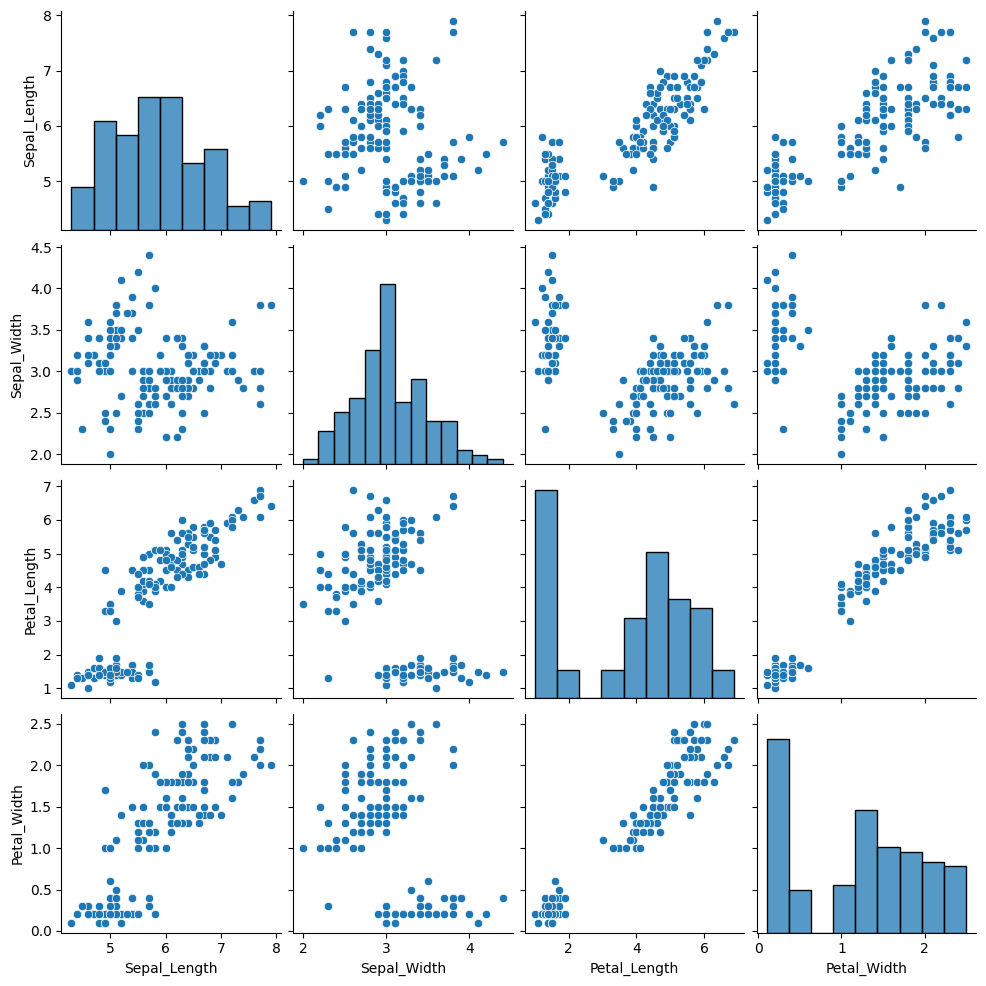

In [8]:
sns.pairplot(iris)

Looking at the Pairs plot, we can see that only the numerical values were graphed above. This makes sense, as nominal values cannot be graphed against numerical in a scatter plot.

We can see that the top right traingle and the bottom left trianlge of scatter plots are a reflection of each other over the y=x line so it's fine to just look at one or the other. The main diagonal shows histograms of the values (i.e. the value plotted against itself) and can demonstrate the skew present in each attribute. From a cursorary glance, it looks like `Sepal_Length` and `Sepal_Width` are approximately normal (symmetric), but `Petal_Length` and `Petal_Width` have left skew.

To make the skew more evident we can graph the density plot for each attribute.

<Axes: xlabel='Sepal_Length', ylabel='Density'>

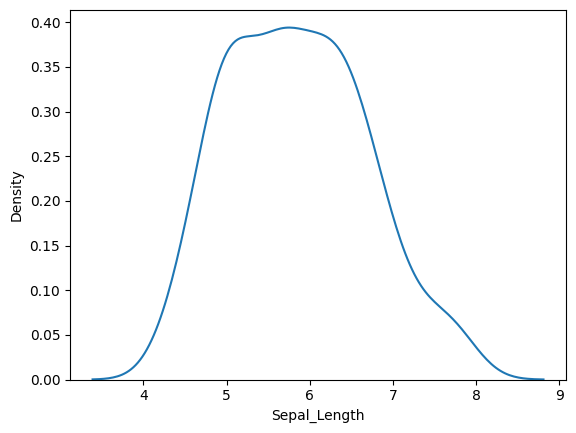

In [9]:
sns.kdeplot(iris['Sepal_Length'])

<Axes: xlabel='Sepal_Width', ylabel='Density'>

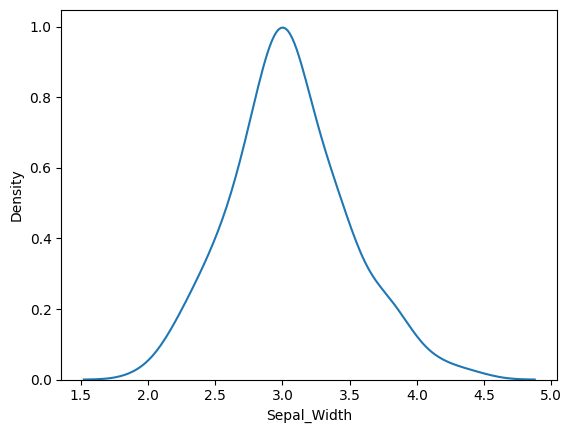

In [10]:
sns.kdeplot(iris['Sepal_Width'])

In [ ]:
sns.kdeplot(iris['Petal_Length'])

In [ ]:
sns.kdeplot(iris['Petal_Width'])

In [11]:
iris.describe()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The `describe` method outputs some summary statistics of the numeric values. We know that mean and standard deviation should be used for normal values, but median (50% percentile) and MAD should be used for skewwed data.

Unfortunately, MAD has been depreciated in Pandas, but this gives us a good oppertunity to learn to how calculate it ourselves as well as index through a Pandas `DataFrame`.


In [ ]:
iris.columns[:-1]

In [17]:
for e in iris.columns[:-1]:
  print(e)
for  i in iris.columns:
  print(i)


iris_MAD = pd.DataFrame(columns = iris.columns[:-1])
mads = []
for attribute in iris.columns[:-1]:
  mad = 1.483 * abs(iris[attribute] - iris[attribute].median()).median()
  mads.append(mad)
iris_MAD.loc[0] = mads
print(iris_MAD)


Sepal_Length
Sepal_Width
Petal_Length
Petal_Width
Sepal_Length
Sepal_Width
Petal_Length
Petal_Width
Class
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0        1.0381      0.37075       1.85375       1.0381


As `Sepal_Length` and `Sepal_Width` are approximately normal, and `Petal_Length` and `Petal_Width` are left skewed (binomal - having two humps in the data rather than one), when talking about center and spread of the values mean and standard devation should be used for the first two whereas median and MAD should be used for the latter two.

In Lecture/Practical 3 we will investigate scenarios where outliers can be removed from the dataset to remove skew, but in this case if we remove the smaller humps to the left it would remove a significant enough amount of data that doing so wouldn't be worthwhile.

### Determining Relationships in the Data

Next, we want to see if there is any evidence of relationships present in the data. Via our pairs plot, there seems to be some sort of correlation between attributes like Petal_Length and Sepal_Length, or Petal_Width and Petal_Length. Using the Pandas `.corr()` method we can get the correlation of all attributes against each other, which will show us the strength of a linear relationship as well as the direction (positive indicating that as the x-axis increases the y-axis also increases also known as a **positive relationship**, negaitve indicating that as the x-axis increases the y-axis decreases also known as a **negative relationship**)

In [21]:
iris.corr()

ValueError: could not convert string to float: 'Iris-setosa'

When you ran that previous code blocks you should have received an error `ValueError: could not convert string to float: 'Iris-setosa'`. Looking at the `head` from earlier, we can see that is one of the values from the `Class` attribute in the data, which we know is nominal. Seaborn is smart enough to recognize nominal attributes and remove them from a Pairs plot, but Pandas `.corr()` Correlation can only be calculated for numerical attributes, so in order to find our correlations let's drop the nominal Class to just compare on numerics.

In [22]:
iris_num = iris.drop(columns=["Class"])
iris_num.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


Similarly to the Pairs plot, `.corr()` returns all of the correlations with the bottom left triangle and top right computing the same thing. The main diagonal is always perfectly correlated (which makes sense as an attribute will vary the exact same amount with itself), so by looking at the correlations between different attributes we can assess the strength of that correlation as well as the direction. Correlation is a meassure from -1 to 1, with values close to 0 in either direction representing a weak correlation (i.e. little evidence that the values vary with respect to each other) and values close to -1 or 1 representing a strong correlation (i.e. greater evidence that the values vary with respect to each other).

Look at our correlations, we can acertain that there are strong positive correlations for `Petal_Length` vs `Petal_Width`, `Petal_Length` vs `Sepal_Length`, and `Petal_Width` vs `Sepal_Length`. We can also see that there are week negative correlations for `Sepal_Width` vs `Sepal_Length`, `Petal_Length` vs `Sepal_Width`, and `Petal_Width` vs `Sepal_Width`.

### Looking Smaller

Now we've seen the correlation between the numeric values for all of the different kinds of Iris, lets see if there is any difference when we break them up by genis (type of flower). The nominal `Class` attribute describes the type of Iris, so by graphing a bar plot of the values in `Class` we can determine which Iris types represent the most and the least entities in our data.

<Axes: ylabel='Class'>

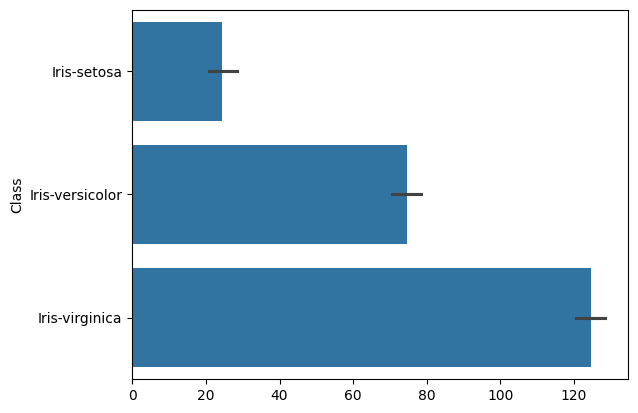

In [23]:
sns.barplot(iris["Class"])

We can see from the above bar plot that `Iris-virginica` is the most represented Iris type in the dataset (with over 120 entities being `Iris-virginica` and `Iris-setosa` is the least. We can isolate these types into two seperate DataFrame objects using pattern matching.

In [24]:
iris_virginica = iris[iris['Class'].str.contains("Iris-virginica")].drop(columns=["Class"])
iris_virginica.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,0.457228,0.864225,0.281108
Sepal_Width,0.457228,1.000000,0.401045,0.537728
Petal_Length,0.864225,0.401045,1.000000,0.322108
Petal_Width,0.281108,0.537728,0.322108,1.000000


In [ ]:
iris_setosa = iris[iris['Class'].str.contains("Iris-setosa")].drop(columns=["Class"])
iris_setosa.corr()

Looking at the correlations after seperating the Iris types out, we can see that except for `Petal_width` vs `Sepal_legnth`, every relationship has changed in intensity.

It can be good to divide your numerical data into subgroups based upon the nominal classifications in the data. While they might not be graphical numerically, nominal values can tell us a lot about the data and here's one way to explore that further.

## Try things yourself!

In this practical we have
- Loaded the data
- Looked at summary statis
- Used a few graphics tools
- Talked about numeric and nominal values
- Analysed correlation in numeric data
- Compared the correlation in the data between subgroups

Please feel free to use this time to explore the data further yourself. There are plenty of interesting graphics in Seaborn and Matplotlib that we have not explored here, as well as analysis and stats in Pandas.

If you would like a further challenge, [here](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv) is the link to the Titanic dataset which you can explore. Make your own decisions about how to explore the data, and provide your rationales for what you do. A few example questions you could analyse would be:
- Which class was most likely to surive?
- How many people your age survived and died?
- Is there any relations in the data which might suggest survival?

In [ ]:
titanic_file = "https://github.com/datasciencedojo/datasets/blob/master/titanic.csv"